In [3]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

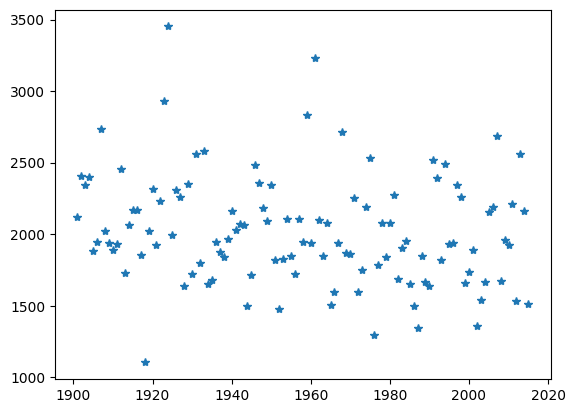

In [5]:
import numpy as np
x=pd.read_csv(r"C:\Users\S.Yashvant\Downloads\Flood prediction\kerala.csv")
y=pd.read_csv(r"C:\Users\S.Yashvant\Downloads\Flood prediction\kerala.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [6]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      




    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

     ...    NOV    DEC  ANNUAL  Jan-Feb

In [8]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [9]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = x.iloc[:, [16, 20, 21]].values
y1 = x.iloc[:, 19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


#X1= scale(X)
#print(X1)

Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))  # PRINTS THE ACCURACY
#ypred=Lr.score(X_test,Y_test)
#print(ypred)






0.8608695652173913


In [12]:

q1=275 # present years march to may rainfall data on average
w1=130 #average rainfall in past 10 days of june
e1=260 #average inscrease in rainfall from may to june 

q2=200 # present years march to may rainfall data on average
w2=400 #average rainfall in past 10 days of june
e2=300 #average inscrease in rainfall from may to june 


l=[[q1,w1,e1],[q2,w2,e2],[50,300,205]]

#print(X)

#ypred=Lr.predict(X)
f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
        
"""
print("data1 prediction",f1[0],"=")
print("data2 prediction",f1[1])
"""

0 - no chance of severe flood
0 - no chance of severe flood
0 - no chance of severe flood


'\nprint("data1 prediction",f1[0],"=")\nprint("data2 prediction",f1[1])\n'